In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Unit tests

In [2]:
import unittest

In [3]:
def fnc(x=None):
    return (x**2 - x**3 + x**4)

In [12]:
class fncTestCase(unittest.TestCase):
    def testZero(self):
        self.assertAlmostEqual(fnc(0.), 0.)
    def testOne(self):
        self.assertAlmostEqual(fnc(1.), 1.)
        #self.assertEqual(fnc(2.), 12.)

In [13]:
t = fncTestCase()
t.testZero()

In [14]:
help(unittest)

Help on package unittest:

NAME
    unittest

MODULE REFERENCE
    https://docs.python.org/3.5/library/unittest.html
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

DESCRIPTION
    Python unit testing framework, based on Erich Gamma's JUnit and Kent Beck's
    Smalltalk testing framework (used with permission).
    
    This module contains the core framework classes that form the basis of
    specific test cases and suites (TestCase, TestSuite etc.), and also a
    text-based utility class for running the tests and reporting the results
     (TextTestRunner).
    
    Simple usage:
    
        import unittest
    
        class IntegerArithmeticTestCase(unittest.TestCase):
            def testAdd(self):  ## tes

## Distribution of round-off errors

We can investigate what round-off errors look like by picking a bunch of random float64 values, recasting them as float32, and looking at the difference. This tells us the distribution of errors in float32 relative to the "right answer." Of course there are similar errors in float32 values, but of course much smaller.

Note we have to assume we are picking good random numbers. We'll talk later about how random numbers are actually generated.

In [14]:
values_64 = np.random.random(size=100000)
values_32 = np.float32(values_64)
diff = np.float64(values_32) - values_64

(array([ 1013.,  1003.,   960.,  1040.,  1001.,   942.,  1068.,   997.,
         1000.,   961.,  1046.,  1015.,   973.,  1005.,   996.,   983.,
         1007.,   973.,  1008.,  1041.,  1014.,  1010.,  1028.,   998.,
          977.,  1057.,  1037.,  1002.,  1014.,   960.,   972.,   958.,
         1090.,   966.,   993.,   985.,   957.,   963.,  1005.,  1045.,
         1027.,  1051.,  1016.,   966.,  1034.,  1017.,   992.,   985.,
         1029.,  1053.,  1012.,   934.,  1030.,  1002.,   970.,   976.,
         1038.,  1016.,   976.,   975.,   942.,   992.,  1028.,  1005.,
          976.,   972.,   980.,   974.,  1017.,  1018.,  1039.,  1021.,
          960.,  1003.,  1006.,  1027.,  1043.,  1005.,   965.,   954.,
         1038.,  1000.,   981.,   989.,  1025.,   976.,  1030.,   993.,
         1041.,   951.,   974.,   986.,   956.,   994.,   989.,  1014.,
          989.,  1033.,   996.,   956.]),
 array([ -5.96030465e-08,  -5.84109963e-08,  -5.72189462e-08,
         -5.60268960e-08,  -5.48

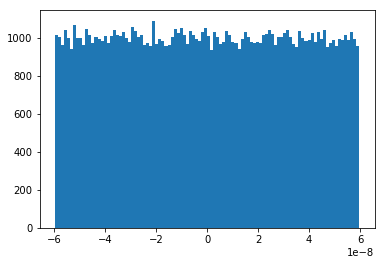

In [15]:
plt.hist(diff, bins=100)

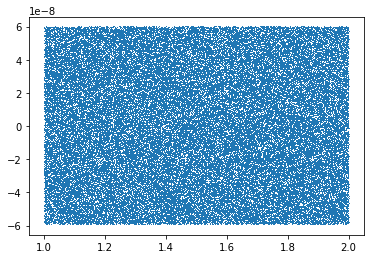

In [16]:
plt.plot(values_64, diff, ',')

(array([   25.,    35.,    70.,    90.,   101.,   162.,   165.,   215.,
          257.,   279.,   299.,   356.,   379.,   452.,   497.,   574.,
          597.,   671.,   779.,   850.,   966.,  1062.,  1193.,  1330.,
         1442.,  1522.,  1493.,  1518.,  1460.,  1533.,  1512.,  1478.,
         1460.,  1527.,  1427.,  1478.,  1489.,  1501.,  1495.,  1517.,
         1478.,  1467.,  1467.,  1531.,  1543.,  1465.,  1534.,  1504.,
         1471.,  1574.,  1427.,  1506.,  1528.,  1458.,  1490.,  1470.,
         1437.,  1485.,  1488.,  1496.,  1466.,  1494.,  1507.,  1505.,
         1459.,  1484.,  1480.,  1433.,  1487.,  1485.,  1480.,  1526.,
         1482.,  1473.,  1432.,  1488.,  1310.,  1142.,  1027.,   948.,
          839.,   772.,   685.,   612.,   525.,   470.,   494.,   439.,
          381.,   301.,   256.,   242.,   182.,   177.,   134.,   119.,
           78.,    55.,    35.,    21.]),
 array([ -5.91137803e-08,  -5.79306355e-08,  -5.67474907e-08,
         -5.55643458e-08,  -5.43

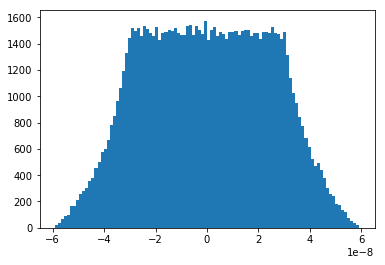

In [17]:
plt.hist(diff / values_64, bins=100)

## Round-off vs. approximation errors

In [21]:
def fnc_int(limits=None):
    return ((limits[1]**3 - limits[0]**3) / 3. - 
            (limits[1]**4 - limits[0]**4) / 4. + 
            (limits[1]**5 - limits[0]**5) / 5.)

In [3]:
def fnc(x=None):
    return (x**2 - x**3 + x**4)

In [4]:
def integrate_fnc(limits=None, nstep=None, fnc=None, dtype=None):
    instep = 1. / np.float64(nstep).astype(dtype)
    step = (limits[1] - limits[0]) * instep 
    middles = limits[0] + (np.arange(nstep, dtype=dtype) + 0.5) * instep * (limits[1] - limits[0])
    values = fnc(middles)
    return (values.sum() * step)

In [5]:
dtype = np.float32

In [6]:
def test_integrate(dtype=None):
    limits = np.array([1., 2.], dtype=dtype)
    nstep_low = 10
    nstep_high = 100000000
    nnsteps = 50
    nsteps = 10.**(np.log10(nstep_low) +
                   (np.log10(nstep_high) - np.log10(nstep_low)) * np.arange(nnsteps) /
                   np.float64(nnsteps - 1))
    nsteps = np.int64(nsteps)
    error = np.zeros(nnsteps, dtype=np.float64)
    for indx in np.arange(nnsteps):
        integral = fnc_int(limits=np.float64(limits))
        approx = integrate_fnc(limits=limits, nstep=nsteps[indx], fnc=fnc, dtype=dtype)
        error[indx] = (approx - integral) / integral
    return(nsteps, error)

In [8]:
(nsteps64, error64) = test_integrate(dtype=np.float64)
(nsteps32, error32) = test_integrate(dtype=np.float32)

/Users/blanton/anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/Users/blanton/anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


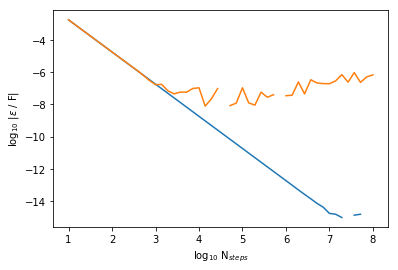

In [11]:
plt.plot(np.log10(nsteps64), np.log10(np.abs(error64)))
plt.plot(np.log10(nsteps32), np.log10(np.abs(error32)))
plt.ylabel('log$_{10}$ |$\epsilon$ / F|')
plt.xlabel('log$_{10}$ N$_{steps}$')

In [19]:
print(3.e-8 * np.sqrt(1.e+4))

3e-06


In [25]:
print(fnc_int(limits=[1.,2]) / 1.e+8 * 3.e-8 * np.sqrt(1.e+8))

1.435e-11
